In [129]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib
from decimal import *
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
%matplotlib inline

## Part 1
### 1.1 Loading and previewing the data set

There are 151 households with about 2.5 residents and 3.6 bedrooms on average. 

In [72]:
#read and preview the file
df = pd.read_csv('IrishElectricity.txt', sep= ' ')
df.head()

,Age,Resident,Attitude.Reduce.Bill,Attitude.Environment,Bedroom,Education,V1,V2,V3,V4,...,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121
19,3,2,1,1,3,5,40.063,38.140,41.999,35.806,...,41.272,43.287,37.298,40.416,36.418,35.781,36.229,35.593,34.700,38.554
56,2,2,2,2,4,5,18.790,15.244,16.311,15.680,...,28.654,27.839,24.630,24.974,24.754,28.091,26.647,26.396,29.365,25.554
84,3,1,1,4,2,3,28.987,27.842,21.867,25.234,...,15.965,16.916,15.535,16.354,16.377,19.216,16.635,16.000,16.225,18.851
91,3,2,1,1,3,4,27.958,50.075,31.616,54.245,...,46.709,40.596,42.184,42.953,45.545,45.579,50.929,46.229,43.912,47.551
118,2,3,1,1,4,5,15.851,23.921,25.420,26.047,...,11.871,12.218,16.976,15.903,16.031,20.562,17.735,11.671,11.555,12.951


In [73]:
# The summary
df.describe()

,Age,Resident,Attitude.Reduce.Bill,Attitude.Environment,Bedroom,Education,V1,V2,V3,V4,...,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,...,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,4.072848,2.569536,1.198675,1.317881,3.629139,3.966887,27.648126,29.339815,28.459132,27.666252,...,24.593066,24.249490,24.718695,24.531841,23.885748,24.651013,23.972834,24.094974,23.205212,24.327642
std,1.233420,0.976456,0.577580,0.646744,0.829585,1.073420,13.347740,13.129068,13.784653,12.963579,...,11.140777,10.957568,10.818690,11.271830,10.650570,10.693935,10.582151,10.796104,10.979554,10.881448
min,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,6.927000,5.442000,1.942000,7.219000,...,2.433000,2.495000,2.480000,2.413000,2.510000,2.484000,2.463000,2.420000,2.550000,5.600000
25%,3.000000,2.000000,1.000000,1.000000,3.000000,3.000000,17.238000,18.797500,18.282000,18.671500,...,16.210000,16.212000,17.016500,16.400000,16.741500,16.929500,16.525500,16.541500,15.019000,16.350500
50%,4.000000,2.000000,1.000000,1.000000,4.000000,4.000000,25.460000,27.299000,27.032000,24.788000,...,22.783000,21.975000,23.852000,22.922000,22.490000,23.084000,22.385000,22.993000,21.358000,22.206000
75%,5.000000,3.000000,1.000000,1.000000,4.000000,5.000000,33.835500,37.139500,35.892000,33.717500,...,32.366500,31.401000,32.653500,32.410000,31.113500,32.464000,31.711000,30.163000,30.050500,32.686000
max,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,80.166000,62.899000,72.881000,72.262000,...,58.848000,60.099000,55.532000,59.387000,65.143000,58.023000,53.083000,53.092000,59.013000,57.499000


### 1.2 Households with more than 3 residents

There are 30 households with more than 3 residents . 

In [74]:
df[df['Resident'] > 3].describe()

,Age,Resident,Attitude.Reduce.Bill,Attitude.Environment,Bedroom,Education,V1,V2,V3,V4,...,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,4.300000,4.233333,1.233333,1.433333,4.100000,4.066667,34.28940,35.574600,34.876867,32.022933,...,32.227700,32.794467,32.975000,32.604967,31.509367,31.675000,32.253433,31.134300,31.840333,32.310300
std,0.749713,0.430183,0.817200,0.858360,0.607425,1.112107,14.57624,11.938548,11.601794,11.516743,...,9.073874,10.565255,9.456128,9.279498,8.121223,6.826057,8.271634,9.242826,10.038973,8.372563
min,3.000000,4.000000,1.000000,1.000000,3.000000,1.000000,13.98000,17.393000,16.533000,18.288000,...,16.223000,16.342000,16.117000,16.438000,16.802000,18.811000,19.252000,17.641000,15.139000,17.819000
25%,4.000000,4.000000,1.000000,1.000000,4.000000,3.250000,24.23325,27.176250,26.546000,23.807500,...,27.603000,26.631500,26.772500,26.442250,27.255000,27.260000,25.493750,23.976750,22.159500,26.354750
50%,4.000000,4.000000,1.000000,1.000000,4.000000,4.000000,31.19300,32.319500,34.794000,28.082000,...,31.693000,31.967500,33.442000,32.514500,30.793500,32.174000,31.711000,30.751000,30.404000,32.764500
75%,4.750000,4.000000,1.000000,2.000000,4.000000,5.000000,43.21900,41.187500,41.610000,36.797750,...,38.518750,39.999750,38.867000,38.399250,37.471500,36.393250,36.775250,35.006750,38.101000,36.708000
max,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,80.16600,61.743000,63.840000,60.079000,...,50.407000,60.099000,55.532000,56.376000,48.422000,45.639000,49.454000,49.847000,50.542000,50.297000


### 1.3 Households with more than 3 residents and a education level greater than 4
There are 14 households with the given condition . 

In [75]:
df[(df['Resident'] > 3) & (df['Education'] > 4)].describe()

,Age,Resident,Attitude.Reduce.Bill,Attitude.Environment,Bedroom,Education,V1,V2,V3,V4,...,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121
count,14.000000,14.000000,14.0,14.000000,14.000000,14.0,14.000000,14.000000,14.000000,14.000000,...,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,4.285714,4.142857,1.0,1.285714,4.214286,5.0,38.505429,38.676714,36.780214,34.614643,...,34.919357,36.845429,37.004214,36.873071,34.947286,34.087357,34.854071,34.947500,36.227214,35.677643
std,0.726273,0.363137,0.0,0.611250,0.699293,0.0,16.246715,13.963724,12.006771,13.942019,...,9.710242,11.895125,10.199452,10.147542,8.381100,7.337899,9.913961,10.228894,10.932613,9.102293
min,3.000000,4.000000,1.0,1.000000,3.000000,5.0,17.776000,18.793000,16.533000,18.288000,...,16.223000,16.382000,18.198000,18.564000,20.469000,21.042000,19.392000,20.809000,18.427000,21.058000
25%,4.000000,4.000000,1.0,1.000000,4.000000,5.0,27.694000,27.234500,30.790250,24.897750,...,28.785000,28.810500,31.358250,31.979250,30.486500,29.562500,28.108250,26.600500,29.128500,30.677500
50%,4.000000,4.000000,1.0,1.000000,4.000000,5.0,34.741500,35.877500,36.550000,29.065000,...,33.372500,37.521000,37.452000,35.724000,35.151000,34.279500,35.799000,34.087500,38.004000,36.332000
75%,4.750000,4.000000,1.0,1.000000,5.000000,5.0,46.118500,52.914250,38.820000,47.450000,...,40.645500,42.457500,42.696500,42.752500,40.896000,38.829250,43.100250,42.992250,45.017250,40.209250
max,6.000000,5.000000,1.0,3.000000,5.000000,5.0,80.166000,61.743000,63.840000,60.079000,...,50.407000,60.099000,55.532000,56.376000,48.422000,45.639000,49.454000,49.847000,50.542000,50.297000


### 1.4 Linear Correlation between number of resident and average daily electricity usage

To find linear correlation between the number of residents and the electricity usage, we will add the average electricity usage 

In [104]:
df_electricity_total = df.iloc[:,6:].apply(np.sum , axis= 1)
df_electricity_average = df_electricity_total/121
df['average'] = df_electricity_average
#df_electricity_average

There is only about 30% correlation between the number of resident of daily average electricity usage. So, let's plot to see how the graph looks like ?

In [77]:
resident_cor = df['Resident'].corr(df['average'])
print("Correlation between number of resident and average electricity {} %".format(resident_cor* 100))



Correlation between number of resident and average electricity 30.168781853832126 %


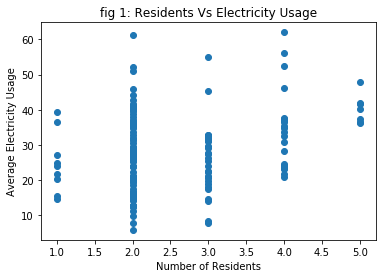

In [78]:
#Scatter plot 

plt.scatter(df['Resident'],df['average'])
plt.xlabel('Number of Residents')
plt.ylabel('Average Electricity Usage')
plt.title("fig 1: Residents Vs Electricity Usage")  

So, let's examine which columns are related to the electricity usage. Number of bedroom has higher weight than number of resident.

In [79]:
y = df['average'].values
x = df[['Age','Resident','Attitude.Reduce.Bill','Attitude.Environment','Bedroom','Education']].values
reg = LinearRegression().fit(x,y)
print(reg.score(x,y))
print(reg.coef_)


0.374336764801
[-1.12612795  2.44280484 -1.73300061 -1.32763741  6.5041104   0.83203384]


There is about 54.5% correlation with bedroom and average energy usage. Although number of resident could be related to electricity usage, considering number of bedroom makes more sense since there are more energy usage from electrical appliances.

In [80]:
bed_cor = df['Bedroom'].corr(df['average'])

print("Correlation between number of bedroom and average electricity {} %".format(bed_cor* 100))

Correlation between number of bedroom and average electricity 54.5092557736029 %


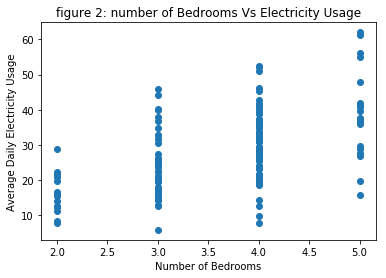

In [81]:
plt.scatter(df['Bedroom'],df['average'])
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Daily Electricity Usage')
plt.title("figure 2: number of Bedrooms Vs Electricity Usage")

### 1.5 Removing outliers
Generally, data points which fall outside of 3 or 2 standard deviations are removed.However, we cannot just remove from overall data panel since it is safe to assume that households with more bedrooms and residents will use more energy. Hence, we need to group either by number of bedroom or resident.

Here in my analysis, I will remove outliers by grouping the number of bedrooms rather than the number of residents. Although it is partially subjective, it makes sense to assume that more rooms with more electrical applicances will consume more energy than two persons sharing a single room. Please see below examples which show that few residents which use more bedrooms consume more electricity than the average. 

### 1.6 Households with one residents with 4 or 5 bedrooms

In [82]:

df[ (df['Resident'] == 1) & (df['average'] > 30)]

,Age,Resident,Attitude.Reduce.Bill,Attitude.Environment,Bedroom,Education,V1,V2,V3,V4,...,V113,V114,V115,V116,V117,V118,V119,V120,V121,average
1174,2,1,1,1,4,4,42.786,37.491,38.310,39.402,...,28.979,45.234,37.727,31.218,34.248,34.060,34.061,33.153,32.752,39.261893
1750,2,1,1,1,5,5,32.855,59.970,34.515,33.053,...,21.975,32.305,31.849,27.321,32.335,29.739,26.210,29.551,35.284,36.377306


#### 1.7 Households with one residents with 4 or 5 bedrooms

In [83]:
df[ (df['Resident'] == 2) & (df['average'] > 45)]

,Age,Resident,Attitude.Reduce.Bill,Attitude.Environment,Bedroom,Education,V1,V2,V3,V4,...,V113,V114,V115,V116,V117,V118,V119,V120,V121,average
1204,3,2,1,1,3,3,44.916,44.782,56.420,43.917,...,45.420,40.976,35.127,42.421,42.730,40.668,42.863,39.621,38.479,45.841917
2033,3,2,1,1,4,5,55.520,62.899,68.088,54.912,...,31.413,38.687,34.382,37.672,38.034,35.213,36.597,32.286,39.373,51.155116
2748,3,2,2,2,4,5,50.068,58.137,58.218,54.088,...,35.710,45.755,41.158,42.039,46.795,38.315,47.591,37.550,36.922,52.221694
3318,6,2,1,1,5,3,69.934,56.376,70.845,68.872,...,50.567,53.200,59.387,55.766,58.023,51.199,53.092,51.131,54.667,61.149570


### 1.8 Outlier algorithm

In [135]:

df_clean = df
def detect_outlier(lst):
    outliers = []
    
    threshold = 2
    mean_ = np.mean(lst)
    std_ = np.std(lst)
    
    for y in lst:
        z_score = (y-mean_)/std_
        if np.abs(z_score) > threshold:
            outliers.append(y)
            
    return outliers

outlier_bedroom_map = {}

for i in range(2,6):
    
    outlier_bedroom_map[i] = detect_outlier(df_clean[df_clean['Bedroom'] == i].average.tolist())
    

for key,value in outlier_bedroom_map.items():
    if (len(value) != 0 ):
        #print("number of bedrooms with outlier {} ".format(key))
        for i in value:    
            drop_index = df_clean.index[(df_clean.Bedroom == key) & (df_clean.average == i)][0]
            df_clean.drop(drop_index, inplace = True)

df_clean.describe()

,Age,Resident,Attitude.Reduce.Bill,Attitude.Environment,Bedroom,Education,V1,V2,V3,V4,...,V113,V114,V115,V116,V117,V118,V119,V120,V121,average
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,...,135.00000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,4.125926,2.577778,1.207407,1.318519,3.644444,3.962963,26.951541,28.495867,27.427333,26.762378,...,23.63943,24.162193,24.027993,23.334193,24.205741,23.299141,23.562222,22.664726,23.644674,27.629012
std,1.242468,0.980912,0.599705,0.665256,0.850519,1.039571,12.657015,11.968881,11.999870,11.541212,...,10.15299,10.039843,10.603618,9.831933,9.887895,9.563434,9.830112,10.296857,10.226848,10.225951
min,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,6.927000,5.442000,9.006000,7.219000,...,5.95600,6.030000,5.933000,5.809000,6.422000,6.116000,4.865000,5.086000,5.600000,7.954733
25%,3.000000,2.000000,1.000000,1.000000,3.000000,3.000000,17.329000,18.832000,18.441000,18.742500,...,16.36200,17.143000,16.478000,16.822000,17.797500,16.597000,16.860000,15.117500,16.410000,20.322208
50%,4.000000,2.000000,1.000000,1.000000,4.000000,4.000000,25.266000,26.567000,26.786000,24.307000,...,21.64400,22.427000,22.123000,22.164000,22.723000,21.660000,22.792000,21.120000,21.689000,26.468558
75%,5.000000,3.000000,1.000000,1.000000,4.000000,5.000000,32.790500,36.250500,34.326500,31.731500,...,29.96850,30.366000,31.110000,28.621000,30.767000,29.137500,28.472500,29.382500,30.572000,34.523896
max,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,80.166000,61.743000,70.845000,68.872000,...,60.09900,55.532000,59.387000,65.143000,58.023000,53.083000,53.092000,59.013000,57.499000,62.562558


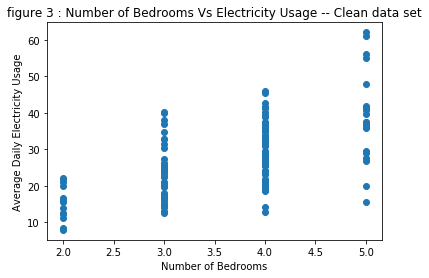

In [85]:
# scatter plot after removing outliers
plt.scatter(df_clean['Bedroom'],df_clean['average'])
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Daily Electricity Usage')
plt.title("figure 3 : Number of Bedrooms Vs Electricity Usage -- Clean data set")

### 1.9 : new correlation after removing outliers

In [86]:
new_bed_cor = 100*(df_clean['Bedroom'].corr(df_clean['average']))
print("Correlation between number of bedroom and average electricity {} %".format(new_bed_cor))
new_res_cor = 100*(df_clean['Resident'].corr(df_clean['average']))
print("Correlation between number of resident and average electricity {} %".format(new_res_cor))

y = df_clean['average'].values
x = df_clean[['Age','Resident','Attitude.Reduce.Bill','Attitude.Environment','Bedroom','Education']].values
reg = LinearRegression().fit(x,y)
print(reg.score(x,y))
print(reg.coef_)

Correlation between number of bedroom and average electricity 61.61507534662996 %
Correlation between number of resident and average electricity 32.541387268595805 %
0.447966413516
[-0.39354789  2.24487729 -2.38844924 -0.79862742  6.89433444  0.31644959]


### 2: Comparing House ID 803 and 3613

There are more residents and bedrooms in 3613 than in 803 and hence more daily average electricity usage. 

In [121]:

df_803 = pd.DataFrame(df.loc[803])
df_3613 = pd.DataFrame(df.loc[3613])
print(pd.concat([df_803,df_3613] , axis = 1) .head(6))
pd.concat([df_803,df_3613] , axis = 1) .tail(1)

                      803   3613
Age                    2.0   4.0
Resident               1.0   5.0
Attitude.Reduce.Bill   1.0   1.0
Attitude.Environment   1.0   1.0
Bedroom                3.0   5.0
Education              3.0   5.0


,803,3613
average,24.138,37.648666


### 2.1: Figure 4 for 803 Vs 3613

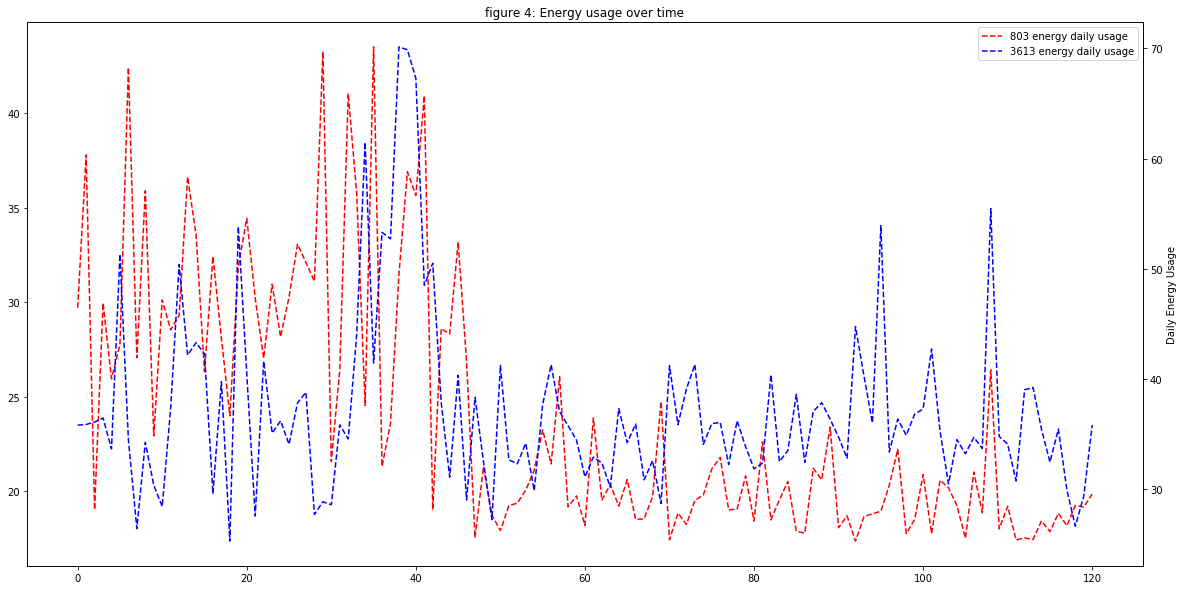

In [88]:

#Create Vlist for x axis
V_list = ['V'+str(i) for i in range(1,122)]

#change 803 to list to plot 
lst_803 = df.loc[[803],V_list].values.tolist()
y1 = [round(i,2) for i in lst_803[0]]
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)
lns1 = ax1.plot(y1,'r-',linestyle='--' , label = '803 energy daily usage')

#change 3613 to list to plot 

lst_3613 = df.loc[[3613],V_list].values.tolist()
y2 = [round(i,2) for i in lst_3613[0]]
ax2 = ax1.twinx()
lns2 = ax2.plot(y2,'b-',linestyle='--', label = '3613 energy daily usage')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=0)
plt.ylabel('Daily Energy Usage')
plt.xlabel('Days for 4 months')

plt.title("figure 4: Energy usage over time")  

### 2.2 Electricity Usage Trend by population

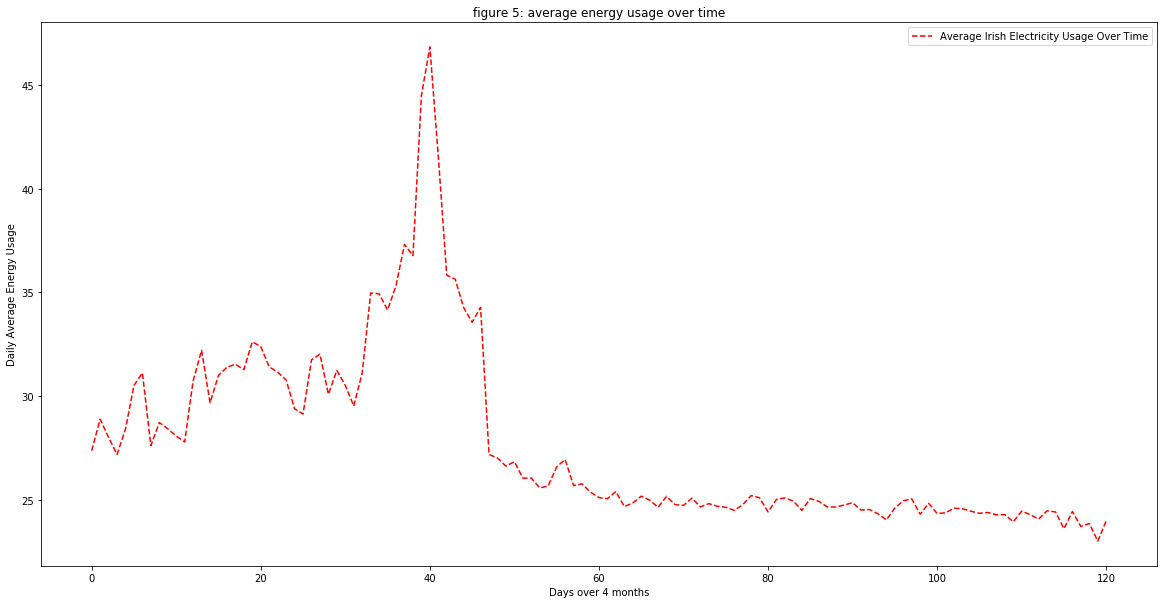

In [116]:
lst_ = df.iloc[:,6:-1].apply(np.average).values
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)
lns1 = ax1.plot(lst_,'r-',linestyle='--' , label = 'Average Irish Electricity Usage Over Time')
ax1.legend()
plt.ylabel('Daily Average Energy Usage')
plt.xlabel('Days over 4 months')
plt.title("figure 5: average energy usage over time") 

### 2.3: Household 803 Vs 3613

Figure 4 already shows the comparision between energy usage by house 803 and that of 3613. House 3613 (which has more rooms and residents) use more electricity after the policy change. 

After averaging (see below) the usage for both households before and after 45th day, we can see that house 3613 could only use 12.51% whereas 803 could drop by 34.82 %. 

It makes sense to think that one resident with 3 bedrooms can manage to reduce than five residents with five bedrooms. This reaffirms our theory that government raises the utility price. 

In [89]:


def find_average(lst):
    return (sum(lst)/len(lst))

def multiply_to_graph(num, length_lst):
    return [num for i in range(length_lst)]

def percentange_difference(before,after):
    return (round((before-after) * 100 /before,2))


# find average electricity usage before 45 and after 45 for house 803

V_list_before_45 = ['V'+str(i) for i in range(1,46)]
V_list_after_45 = ['V'+str(i) for i in range(46,121)]

lst_803_before_45 = df.loc[[803],V_list_before_45].values.tolist()
before_803_average = round(find_average(lst_803_before_45[0]),2)


lst_803_after_45 = df.loc[[803],V_list_after_45].values.tolist()
after_803_average = round(find_average(lst_803_after_45[0]),2)

lst_803_before = multiply_to_graph(before_803_average, len(V_list_before_45))
lst_803_after = multiply_to_graph(after_803_average, len(V_list_after_45))
lst_803_avg = lst_803_before + lst_803_after


# find average electricity usage before 45 and after 45 for house 3613

V_list_before_45 = ['V'+str(i) for i in range(1,46)]
V_list_after_45 = ['V'+str(i) for i in range(46,121)]

lst_3613_before_45 = df.loc[[3613],V_list_before_45].values.tolist()
before_3613_average = round(find_average(lst_3613_before_45[0]),2)


lst_3613_after_45 = df.loc[[3613],V_list_after_45].values.tolist()
after_3613_average = round(find_average(lst_3613_after_45[0]),2)

lst_3613_before = multiply_to_graph(before_3613_average, len(V_list_before_45))
lst_3613_after = multiply_to_graph(after_3613_average, len(V_list_after_45))
lst_3613_avg = lst_3613_before + lst_3613_after

#find average 

print('House 803 consumed {} % less after 45th day'.format(percentange_difference(before_803_average,after_803_average)))

print('House 3613 consumed {} % less after 45th day'.format(percentange_difference(before_3613_average,after_3613_average)))




House 803 consumed 34.82 % less after 45th day
House 3613 consumed 12.51 % less after 45th day


### 2.4 : Figure 5 to illustrate above reasoning

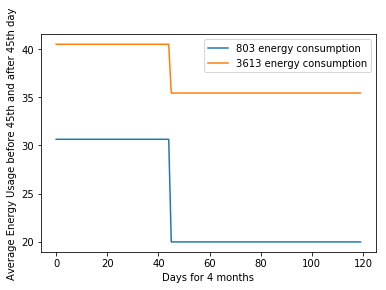

In [90]:
#graph
y1 = lst_803_avg
y2 = lst_3613_avg

plt.plot(y1 , label = '803 energy consumption')
plt.plot(y2 , label = '3613 energy consumption')
plt.legend()
plt.ylabel('Average Energy Usage before 45th and after 45th day')
plt.xlabel('Days for 4 months')
plt.show()

### Figure 6: average utility usage before and after 45th (grouped by bedroom)

- Usage by Households with 2 and 5 bedrooms drop dramatically
- USage by Households with 4 and 3 bedrooms increase.

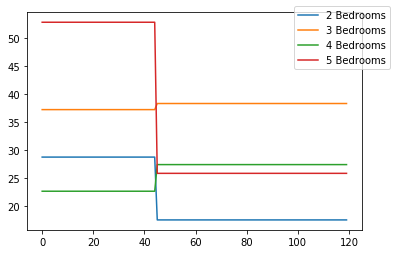

In [132]:
for i in range(2,6):

    before_2_bedroom_lst = df[df['Bedroom'] == i].loc[:,V_list_before_45].values.tolist()
    before_2_bedroom_average = round(find_average(before_2_bedroom_lst[0]),2)

    after_2_bedroom_lst = df[df['Bedroom'] == i].loc[:,V_list_after_45].values.tolist()
    after_2_bedroom_average = round(find_average(after_2_bedroom_lst[0]),2)

    lst_2_bedroom_before = multiply_to_graph(before_2_bedroom_average, len(V_list_before_45))
    lst_2_bedroom_after = multiply_to_graph(after_2_bedroom_average, len(V_list_after_45))
    lst_2_avg = lst_2_bedroom_before + lst_2_bedroom_after
    plt.plot(lst_2_avg, label= str(i)+' Bedrooms')

plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

### Figure 7: average utility usage before and after 45th (grouped by resident)

- Usage by Households with 1 , 3 and 5 residents drop dramatically


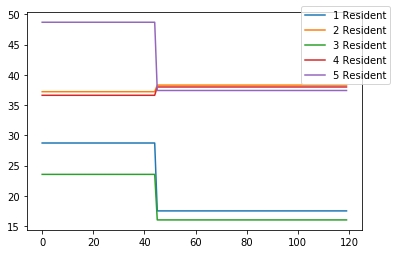

In [134]:


#average electricity usage grouped by number of bedroom

#--2 bedroom

for i in range(1,6):

    before_2_bedroom_lst = df[df['Resident'] == i].loc[:,V_list_before_45].values.tolist()
    before_2_bedroom_average = round(find_average(before_2_bedroom_lst[0]),2)

    after_2_bedroom_lst = df[df['Resident'] == i].loc[:,V_list_after_45].values.tolist()
    after_2_bedroom_average = round(find_average(after_2_bedroom_lst[0]),2)

    lst_2_bedroom_before = multiply_to_graph(before_2_bedroom_average, len(V_list_before_45))
    lst_2_bedroom_after = multiply_to_graph(after_2_bedroom_average, len(V_list_after_45))
    lst_2_avg = lst_2_bedroom_before + lst_2_bedroom_after
    plt.plot(lst_2_avg, label= str(i)+' Resident')

plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

#### 2.5 : Pairwise correlation

In [148]:
df_pairwise = df[['Age','Resident','Attitude.Reduce.Bill','Attitude.Environment','Bedroom','average']]
df_pairwise.corr().iloc[:6,:6]

,Age,Resident,Attitude.Reduce.Bill,Attitude.Environment,Bedroom,average
Age,1.000000,0.080690,0.094888,-0.130146,0.028562,-0.012744
Resident,0.080690,1.000000,0.035803,0.070395,0.239130,0.304180
Attitude.Reduce.Bill,0.094888,0.035803,1.000000,0.450456,-0.059174,-0.172850
Attitude.Environment,-0.130146,0.070395,0.450456,1.000000,-0.062136,-0.113626
Bedroom,0.028562,0.239130,-0.059174,-0.062136,1.000000,0.671404
average,-0.012744,0.304180,-0.172850,-0.113626,0.671404,1.000000


## Part 3

Zip function in python is used to map the index with respective containers. It takes iterable elements as input and returns iterator. 

In [159]:
a = ['hello' , 'hi']
b= ['foo' , 'bar']

x = zip(a,b)

In [161]:
print(list(x))

[('hello', 'foo'), ('hi', 'bar')]


In [1000]:
lst = [i for i in range(1,30) if i%2== 0]
lst

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]

In [1001]:
df_2 = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
df_2.drop_duplicates(keep='first')

,A
0,1
1,2
3,3
4,4
5,5
8,6
9,7


In [1002]:
df_2 = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})

df_sort = df_2.sort_values(by = ['grps','vals'] , ascending=[True, False])
top_3 = df_sort.groupby('grps').head(3)
top_3

,grps,vals
1,a,345
7,a,52
0,a,12
12,b,57
8,b,54
4,b,45
10,c,235
14,c,87
9,c,23


In [1003]:
top_3.groupby('grps').sum()

,vals
grps,
a,409
b,156
c,345
